
## Complain Classification Assignment : Part 2
****


## Workflow

#### 1. Problem Statement and Dataset description
#### 2. Business objective and constrains 
#### 3. Machine learning Formulation and Evalution mtric
#### 4. Loading Dataset
#### 5. Exploratory Data Analyses
#### 6. Pre-processing 
#### 7. Train Test Split
#### 8. Feature engineering 
#### 9. Modeling 
#### 10.Hyperparameter tuning 
#### 11. Results and Conclusion

In [101]:
# Ignore all your warnings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Libraries
import datetime
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import pickle

import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, f1_score, classification_report

from tqdm import tqdm
import os
from wordcloud import WordCloud
from matplotlib_venn import venn2
import re
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
eng_stopwords = stopwords.words('english')
import gc
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import tensorflow
import pylab 
import scipy.stats as stats
from scipy.stats import boxcox
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler
from scipy import sparse as sp
from scipy.sparse import hstack

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


##### Loading datadata Where consumer_complaint_narrative is notnull

In [2]:
# Loaing the data
data = pd.read_pickle('data.pkl')

### 7. Train Test Split

In [3]:
# Splliting the data into X_data and class label

# Class labels and class labels name
class_label, class_label_name = data['product'].factorize()
# Features data
X_data = data.drop(['product'], axis=1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_data, class_label, test_size=0.33, stratify=class_label, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (43995, 29)
Shape of y_train: (43995,)
Shape of X_test: (21670, 29)
Shape of y_test: (21670,)


.
.
.
.


### 8. Feature Engineering 

#### 8.1. Vector Representation of cleaned_consumer_complaint_narrative	 text
##### 1. BOW Representation
##### 2. TF-idf Representation
##### 3. W2V Representation
##### 4. Tf-idf W2V Representation
##### 5. Tf-idf W2V Representation using top idf score

* Note: For word Embedding we have to preprocess the text again to remove stemming as it impact the sentiment of word in Embedding badly.


##### 8.1.1. Bag of Word(BOW) Representation
1. Unigram BOW
2. Bigram BOW
3. Trigram BOW¶

In [4]:
# 1. Unigram BOW
c_vect = CountVectorizer(ngram_range=(1, 1))
train_text_BOW_unigram =  c_vect.fit_transform(X_train['cleaned_consumer_complaint_narrative'])
test_text_BOW_unigram = c_vect.transform(X_test['cleaned_consumer_complaint_narrative'])

# 2. Bigram BOW
c_vect = CountVectorizer(ngram_range=(1, 2))
train_text_BOW_bigram =  c_vect.fit_transform(X_train['cleaned_consumer_complaint_narrative'])
test_text_BOW_bigram = c_vect.transform(X_test['cleaned_consumer_complaint_narrative'])

# 3. Trigram BOW
c_vect = CountVectorizer(ngram_range=(1, 3))
train_text_BOW_trigram =  c_vect.fit_transform(X_train['cleaned_consumer_complaint_narrative'])
test_text_BOW_trigram = c_vect.transform(X_test['cleaned_consumer_complaint_narrative'])

##### 8.1.2. TF-IDF Representation
1. Unigram TF-IDF
2. Bigram TF-IDF
3. Trigram TF-IDF

In [5]:
# 1. Unigram TF-IDF
tf_vect = TfidfVectorizer(ngram_range=(1, 1))
train_text_tfidf_unigram =  tf_vect.fit_transform(X_train['cleaned_consumer_complaint_narrative'])
test_text_tfidf_unigram = tf_vect.transform(X_test['cleaned_consumer_complaint_narrative'])

# 2. Bigram TF-IDF
tf_vect = CountVectorizer(ngram_range=(1, 2))
train_text_tfidf_bigram =  tf_vect.fit_transform(X_train['cleaned_consumer_complaint_narrative'])
test_text_tfidf_bigram = tf_vect.transform(X_test['cleaned_consumer_complaint_narrative'])

# 3. Trigram TF-IDF
tf_vect = CountVectorizer(ngram_range=(1, 3))
train_text_tfidf_trigram =  tf_vect.fit_transform(X_train['cleaned_consumer_complaint_narrative'])
test_text_tfidf_trigram = tf_vect.transform(X_test['cleaned_consumer_complaint_narrative'])

#### 8.1.3. AVG W2V Representation

Refer: https://www.kaggle.com/phoenix9032/quest-preprocessing-data-for-embedding

In [6]:
# Gensim pre trained weights of words loading into memory 
from gensim.models import KeyedVectors

news_path = 'crawl-300d-2M.vec'
embeddings_index = KeyedVectors.load_word2vec_format(news_path, binary=False)

In [7]:
## Building vocubulary from our Quest Data
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

#=========================================================================================================
import operator 
## This is a common function to check coverage between our quest data and the word embedding
def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

##### Check Coverage for cleaned_consumer_complaint_narrative_for_embedding

In [8]:
##Apply the vocab function to get the words and the corresponding counts
sentences = data["cleaned_consumer_complaint_narrative_for_embedding"].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)

print(f"\nFor cleaned_consumer_complaint_narrative: \n{'-'*40}")
oov = check_coverage(vocab,embeddings_index)

## List 10 out of vocabulary word
print(f"\nTop 10 out of vocabulary word: \n{'-'*30}")
oov[:10]

100%|████████████████████████████████████████████████████████████████████████| 49268/49268 [00:00<00:00, 406803.86it/s]



For cleaned_consumer_complaint_narrative: 
----------------------------------------
Found embeddings for 68.00% of vocab
Found embeddings for  99.12% of all text

Top 10 out of vocabulary word: 
------------------------------


[('ocwen', 5947),
 ('nationstar', 3913),
 ('fcra', 2267),
 ('navient', 1900),
 ('fdcpa', 1471),
 ('seterus', 1284),
 ('citimortgage', 708),
 ('rushcard', 525),
 ('pennymac', 443),
 ('respa', 438)]

##### Creating AVG W2V pandas series

In [9]:
# Function to convert dataframe into avg W2V
def avg_w2v_of_text(dataframe):
    
    avg_w2v = []
    
    for sent in tqdm(dataframe):
        
        avg_w2v_sent = np.zeros(300)    
        for word in sent.split():

            try:
                avg_w2v_sent += embeddings_index.word_vec(word)
            except:
                pass

        avg_w2v_sent = avg_w2v_sent/len(sent.split())    
        avg_w2v.append(avg_w2v_sent)   
    
    return avg_w2v

In [25]:
# For Train cleaned_consumer_complaint_narrative_for_embedding
train_cleaned_cleaned_text_for_embedding_w2v =  avg_w2v_of_text(X_train['cleaned_consumer_complaint_narrative_for_embedding'])

# For Test cleaned_consumer_complaint_narrative_for_embedding
test_cleaned_cleaned_text_for_embedding_w2v =  avg_w2v_of_text(X_test['cleaned_consumer_complaint_narrative_for_embedding']) 


# Standard Scaling of Avg W2V
sc=StandardScaler(with_mean=True)

train_cleaned_cleaned_text_for_embedding_w2v = sc.fit_transform(train_cleaned_cleaned_text_for_embedding_w2v)
test_cleaned_cleaned_text_for_embedding_w2v = sc.transform(test_cleaned_cleaned_text_for_embedding_w2v)

100%|██████████████████████████████████████████████████████████████████████████| 21670/21670 [00:05<00:00, 3813.69it/s]


#### Visualisation of procuct category using AVG W2V of text data (PCA Visualisation)

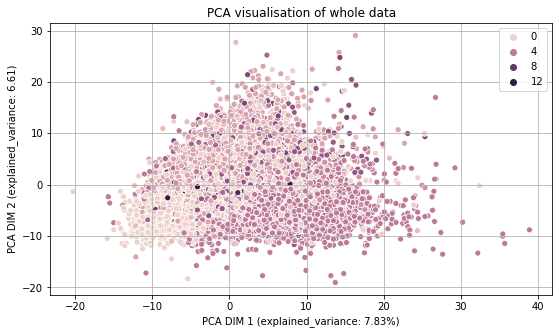

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pca transformation to only top 2 dim
pca = PCA(n_components=2, random_state=1234)
pca_transformed_feat = pca.fit_transform(train_cleaned_cleaned_text_for_embedding_w2v)

# Visualisation of whole data Using PCA

plt.figure(figsize=(9,5))
sns.scatterplot(pca_transformed_feat[:,0],pca_transformed_feat[:,1],hue=y_train)
plt.title("PCA visualisation of whole data")
plt.xlabel(f"PCA DIM 1 (explained_variance: {round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"PCA DIM 2 (explained_variance: {round(pca.explained_variance_ratio_[1]*100,2)})")
plt.grid()

#### 8.1.4. Tf-idf weighted W2V Representation

Refer: https://www.kaggle.com/phoenix9032/quest-preprocessing-data-for-embedding

In [19]:
def tfidf_w2v_of_dataframe(dataframe_train, dataframe_cv = None):
    
    model = TfidfVectorizer()
    tf_idf_matrix = model.fit_transform(dataframe_train)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
    
    # avg tfidf w2v conversion for train
    avg_tfidf_w2v_train = []
    for i in tqdm(range(dataframe_train.shape[0])):
        
        text = dataframe_train.iloc[i] 
        avg_tfidf_w2v_sent = np.zeros(300)       
        len_of_text = len(text.split())
        weighted_sum =0
                             
        for word in text.split():

            try:              
                # dictionary[word] = idf value of word in whole courpus
                # text.count(word)/len_of_text = tf valeus of word in this review
                
                idf_word = dictionary[word] 
                tf_word = text.count(word)/len_of_text
                
                tf_idf_word =  tf_word*idf_word
                weighted_sum += tf_idf_word
                
                avg_tfidf_w2v_sent += embeddings_index.word_vec(word) * tf_idf_word
                
            except:
                pass

        avg_tfidf_w2v_sent = avg_tfidf_w2v_sent/weighted_sum
        avg_tfidf_w2v_train.append(avg_tfidf_w2v_sent)
      
    #====================================================================================================
    if dataframe_cv is not None:
        
        # avg tfidf w2v conversion for cv
        avg_tfidf_w2v_cv = []
        for i in tqdm(range(dataframe_cv.shape[0])):

            text = dataframe_cv.iloc[i] 
            avg_tfidf_w2v_sent = np.zeros(300)       
            len_of_text = len(text.split())
            weighted_sum = 0

            for word in text.split():

                try:      
                    # dictionary[word] = idf value of word in whole courpus
                    # text.count(word)/len_of_text = tf valeus of word in this review

                    idf_word = dictionary[word] 
                    tf_word = text.count(word)/len_of_text

                    tf_idf_word =  tf_word*idf_word
                    weighted_sum += tf_idf_word

                    avg_tfidf_w2v_sent += embeddings_index.word_vec(word) * tf_idf_word

                except:
                    pass

            avg_tfidf_w2v_sent = avg_tfidf_w2v_sent/weighted_sum
            avg_tfidf_w2v_cv.append(avg_tfidf_w2v_sent)       
        
        return avg_tfidf_w2v_train, avg_tfidf_w2v_cv

##### Creating TF-IDF AVG W2V Dataframe

In [20]:
train_cleaned_cleaned_text_for_embedding_tfidf_w2v, test_cleaned_cleaned_text_for_embedding_tfidf_w2v = tfidf_w2v_of_dataframe(X_train['cleaned_consumer_complaint_narrative_for_embedding'],
                                                                                                                              X_test['cleaned_consumer_complaint_narrative_for_embedding'])

# Standard Scaling of TFIDF Avg W2V
sc=StandardScaler(with_mean=True)

train_cleaned_cleaned_text_for_embedding_tfidf_w2v = sc.fit_transform(train_cleaned_cleaned_text_for_embedding_tfidf_w2v)
test_cleaned_cleaned_text_for_embedding_tfidf_w2v = sc.transform(test_cleaned_cleaned_text_for_embedding_tfidf_w2v)


100%|██████████████████████████████████████████████████████████████████████████| 21670/21670 [00:13<00:00, 1632.88it/s]


#### Visualisation of procuct category using TFIDF AVG W2V of text data (PCA Visualisation)

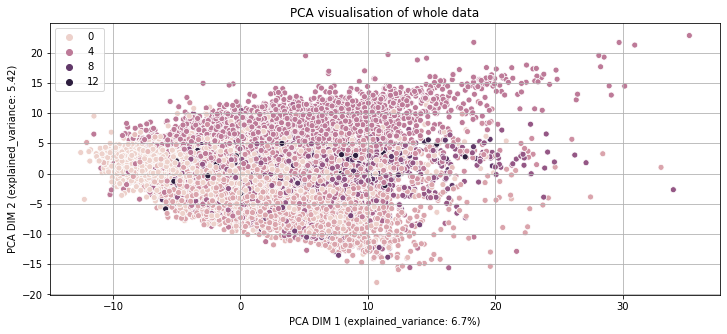

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pca transformation to only top 2 dim
pca = PCA(n_components=2, random_state=1234)
pca_transformed_feat = pca.fit_transform(train_cleaned_cleaned_text_for_embedding_tfidf_w2v)

# Visualisation of whole data Using PCA

plt.figure(figsize=(12,5))
sns.scatterplot(pca_transformed_feat[:,0],pca_transformed_feat[:,1],hue=y_train)
plt.title("PCA visualisation of whole data")
plt.xlabel(f"PCA DIM 1 (explained_variance: {round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"PCA DIM 2 (explained_variance: {round(pca.explained_variance_ratio_[1]*100,2)})")
plt.grid()

### 9. Modeling

##### Utility Function for Modeling and Visualisation

In [30]:
# This function plots the confusion matrices given y_i, y_i_hat.

def plot_confusion_matrix(test_y, predict_y, precision_matrix=True, recall_matrix=True):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2,3,4,5,6,7,8,9,10]
    # representing A in heatmap format
    print("\t","-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    if precision_matrix:
        print("\t","-"*50, "Precision matrix (Columm Sum=1)", "-"*50)
        plt.figure(figsize=(20,7))
        sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Class')
        plt.ylabel('Original Class')
        plt.show()
    
    if recall_matrix:
        # representing B in heatmap format
        print("\t","-"*50, "Recall matrix (Row sum=1)", "-"*50)
        plt.figure(figsize=(20,7))
        sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Class')
        plt.ylabel('Original Class')

### 9.1. Random Modeling

 Log loss on Test Data using Random Model: 2.6940750320103026 

  Classification Report 
              precision    recall  f1-score   support

           0       0.26      0.09      0.14      5655
           1       0.06      0.09      0.07      1211
           2       0.23      0.09      0.13      4920
           3       0.12      0.09      0.10      2610
           4       0.18      0.09      0.12      3918
           5       0.03      0.07      0.04       700
           6       0.07      0.08      0.07      1877
           7       0.01      0.08      0.02       240
           8       0.01      0.08      0.02       219
           9       0.00      0.08      0.00        36
          10       0.01      0.09      0.02       284

    accuracy                           0.09     21670
   macro avg       0.09      0.09      0.07     21670
weighted avg       0.18      0.09      0.11     21670

	 -------------------------------------------------- Confusion matrix ----------------------------

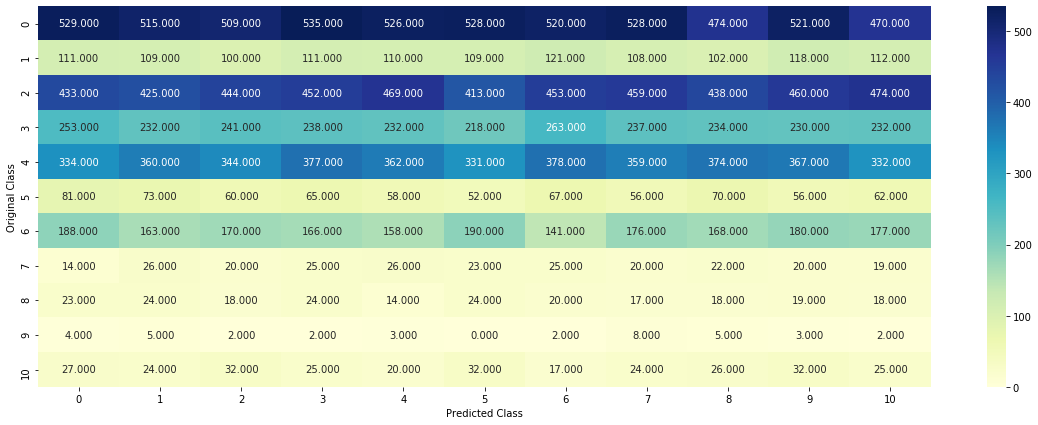

In [31]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = X_test.shape[0]


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,11))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,11)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print(" Log loss on Test Data using Random Model:",log_loss(y_test,test_predicted_y, eps=1e-15),"\n","="*70,"\n")
print("  Classification Report","\n","="*50 )
print(classification_report(y_test, np.argmax(test_predicted_y,axis=1)))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y,precision_matrix=False, recall_matrix=False)

### 9.2. Logistic Regression

#### 9.2.1  Logistic Regression on BOW text data With Class balancing and Hyper paramter tuning

#### Hyper Parameter Tuining for unigram BOW

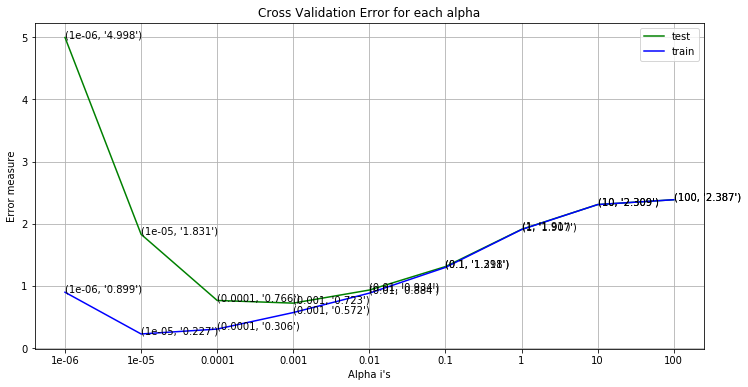

In [129]:
param = {"alpha":[10 ** x for x in range(-6, 3)]}

clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
gscv = GridSearchCV(
                estimator = clf,
                param_grid =param,
                scoring='neg_log_loss',
                n_jobs=-2,
                cv=3,
                verbose=0,
                return_train_score=True,)

gscv.fit(train_text_BOW_unigram, y_train)

# Ploting CV error v/s alpha
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,len(gscv.param_grid['alpha'])+1), -gscv.cv_results_['mean_test_score'],c='g',label = 'test')

# For validation score
for i, txt in enumerate(np.round(-gscv.cv_results_['mean_test_score'],3)):
    plt.annotate((gscv.param_grid['alpha'][i],str(txt)), (np.arange(1,len(gscv.cv_results_['mean_test_score'])+1)[i], -gscv.cv_results_['mean_test_score'][i]))

# For train score
plt.plot(np.arange(1,len(gscv.param_grid['alpha'])+1), -gscv.cv_results_['mean_train_score'],c='b',label = 'train')
for i, txt in enumerate(np.round(-gscv.cv_results_['mean_train_score'],3)):
    plt.annotate((gscv.param_grid['alpha'][i],str(txt)), (np.arange(1,len(gscv.cv_results_['mean_train_score'])+1)[i], -gscv.cv_results_['mean_train_score'][i])) 

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.xticks(ticks=np.arange(1,len(gscv.cv_results_['mean_test_score'])+1), labels=gscv.param_grid['alpha'])
plt.ylabel("Error measure")
plt.legend()
plt.show()

#### Hyper Parameter Tuining for unigram, bigram combine BOW

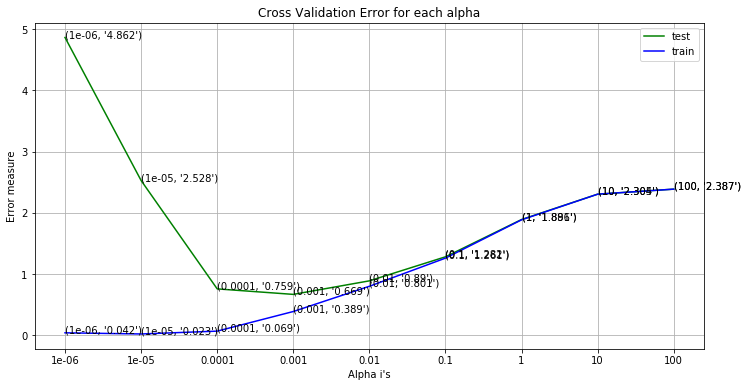

In [130]:
param = {"alpha":[10 ** x for x in range(-6, 3)]}

clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
gscv = GridSearchCV(
                estimator = clf,
                param_grid =param,
                scoring='neg_log_loss',
                n_jobs=-2,
                cv=3,
                verbose=0,
                return_train_score=True,)

gscv.fit(train_text_BOW_bigram, y_train)


# Ploting CV error v/s alpha
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,len(gscv.param_grid['alpha'])+1), -gscv.cv_results_['mean_test_score'],c='g',label = 'test')

# For validation score
for i, txt in enumerate(np.round(-gscv.cv_results_['mean_test_score'],3)):
    plt.annotate((gscv.param_grid['alpha'][i],str(txt)), (np.arange(1,len(gscv.cv_results_['mean_test_score'])+1)[i], -gscv.cv_results_['mean_test_score'][i]))

# For train score
plt.plot(np.arange(1,len(gscv.param_grid['alpha'])+1), -gscv.cv_results_['mean_train_score'],c='b',label = 'train')
for i, txt in enumerate(np.round(-gscv.cv_results_['mean_train_score'],3)):
    plt.annotate((gscv.param_grid['alpha'][i],str(txt)), (np.arange(1,len(gscv.cv_results_['mean_train_score'])+1)[i], -gscv.cv_results_['mean_train_score'][i])) 

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.xticks(ticks=np.arange(1,len(gscv.cv_results_['mean_test_score'])+1), labels=gscv.param_grid['alpha'])
plt.ylabel("Error measure")
plt.legend()
plt.show()

#### Hyper Parameter Tuining for unigram, bigram, trigram combine BOW

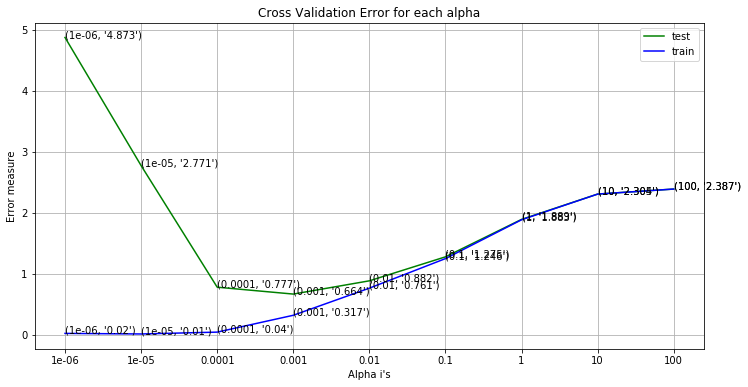

In [131]:
param = {"alpha":[10 ** x for x in range(-6, 3)]}

clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
gscv = GridSearchCV(
                estimator = clf,
                param_grid =param,
                scoring='neg_log_loss',
                n_jobs=-2,
                cv=3,
                verbose=0,
                return_train_score=True,)

gscv.fit(train_text_BOW_trigram, y_train)

# Ploting CV error v/s alpha
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,len(gscv.param_grid['alpha'])+1), -gscv.cv_results_['mean_test_score'],c='g',label = 'test')

# For validation score
for i, txt in enumerate(np.round(-gscv.cv_results_['mean_test_score'],3)):
    plt.annotate((gscv.param_grid['alpha'][i],str(txt)), (np.arange(1,len(gscv.cv_results_['mean_test_score'])+1)[i], -gscv.cv_results_['mean_test_score'][i]))

# For train score
plt.plot(np.arange(1,len(gscv.param_grid['alpha'])+1), -gscv.cv_results_['mean_train_score'],c='b',label = 'train')
for i, txt in enumerate(np.round(-gscv.cv_results_['mean_train_score'],3)):
    plt.annotate((gscv.param_grid['alpha'][i],str(txt)), (np.arange(1,len(gscv.cv_results_['mean_train_score'])+1)[i], -gscv.cv_results_['mean_train_score'][i])) 

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.xticks(ticks=np.arange(1,len(gscv.cv_results_['mean_test_score'])+1), labels=gscv.param_grid['alpha'])
plt.ylabel("Error measure")
plt.legend()
plt.show()

#### Observation:
BOW  unigram, bigram, trigram combine giving minimum loss.

#### Training and Predicting Using best hyperparameter (BOW  unigram, bigram, trigram combine)

In [132]:
best_alpha = 0.001

# Training using best hyperparameter
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_text_BOW_trigram, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_BOW_trigram, y_train)

## Prediction
# for train
predict_y_train = sig_clf.predict_proba(train_text_BOW_trigram)
# for test
predict_y_test = sig_clf.predict_proba(test_text_BOW_trigram)

print(" Log loss on Train Data using Logistic Regression:",log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),"\n","="*70,"\n")
print(" Log loss on Test Data using Logistic Regression:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15),"\n","="*70,"\n")
print("  Classification Report","\n","="*50 )
print(classification_report(y_test, np.argmax(predict_y_test,axis=1)))


 Log loss on Train Data using Logistic Regression: 0.35056978941803646 

 Log loss on Test Data using Logistic Regression: 0.6338590375506143 

  Classification Report 
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      5655
           1       0.78      0.61      0.69      1211
           2       0.93      0.94      0.93      4920
           3       0.81      0.82      0.82      2610
           4       0.90      0.76      0.83      3918
           5       0.94      0.74      0.82       700
           6       0.83      0.79      0.81      1877
           7       0.69      0.22      0.33       240
           8       0.82      0.55      0.66       219
           9       0.00      0.00      0.00        36
          10       0.84      0.71      0.77       284

    accuracy                           0.84     21670
   macro avg       0.75      0.64      0.68     21670
weighted avg       0.84      0.84      0.83     21670



	 -------------------------------------------------- Confusion matrix --------------------------------------------------


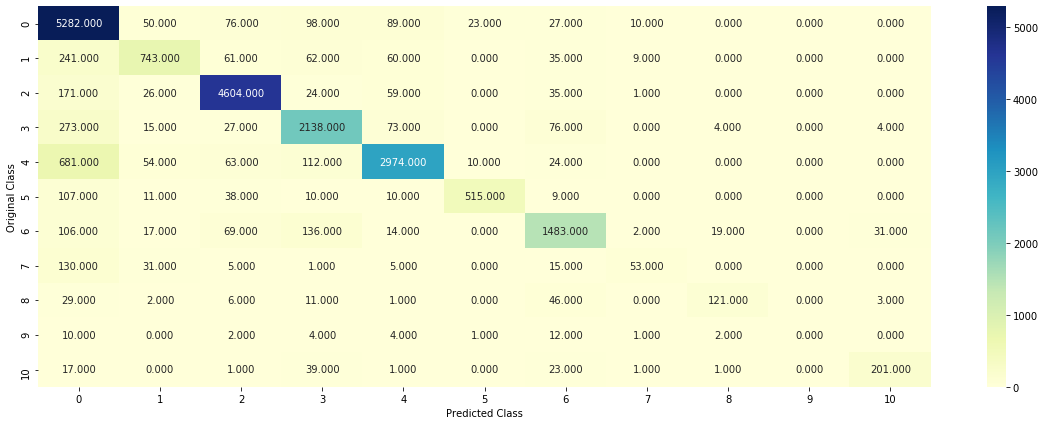

	 -------------------------------------------------- Precision matrix (Columm Sum=1) --------------------------------------------------


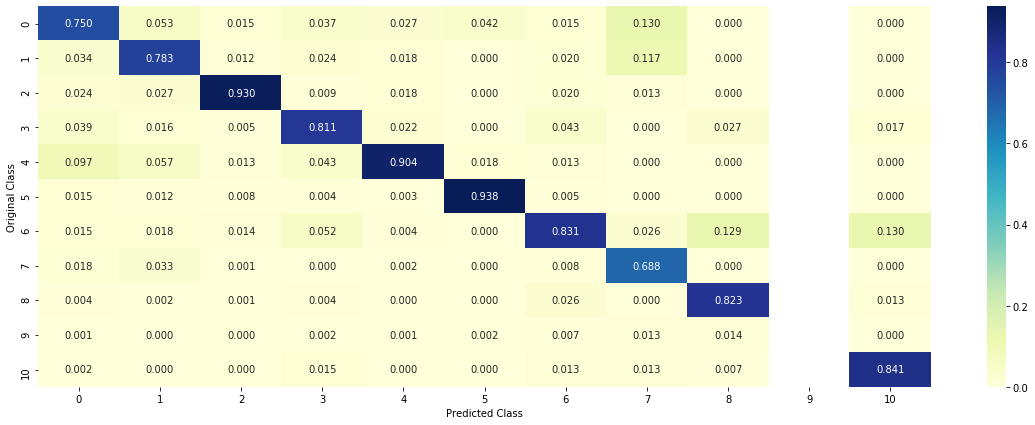

	 -------------------------------------------------- Recall matrix (Row sum=1) --------------------------------------------------


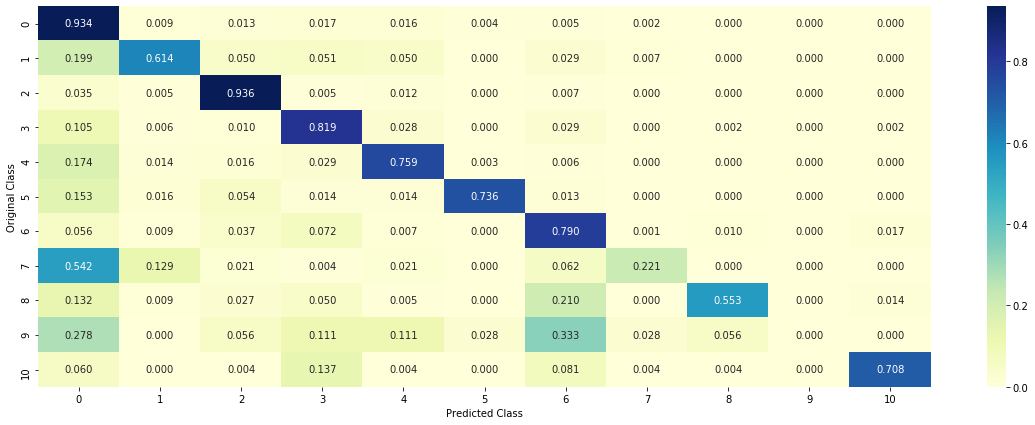

In [133]:
plot_confusion_matrix(y_test, np.argmax(predict_y_test, axis=1), precision_matrix=True, recall_matrix=True)

### Further work

Apply Logistic regression on TFIDF , w2v and TF-IDF w2v

Apply RF on w2v and TF-IDF w2v

Apply GBDT on w2v and TF-IDF w2v
